In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
# Load the dataset
file_path = 'C:/Users/madhu/marketing_campaign.csv'
df = pd.read_csv(file_path, sep=';')

In [5]:
# Display the first 5 rows of the dataframe
print(df.head())

  ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0  5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1  2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                                                                      

In [6]:
# Display summary information about the dataset
print("\nInfo about the dataset:")
print(df.info())


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	M

In [7]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse    0
dtype: int64


In [8]:
### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.
# Step 1: Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Step 2: Decide on a strategy to handle missing values
# For this demonstration, let's fill missing values with the mean for numerical columns
# and with the mode for categorical columns

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df_filled = df.copy()
for col in numerical_cols:
    df_filled[col].fillna(df[col].mean(), inplace=True)

for col in categorical_cols:
    df_filled[col].fillna(df[col].mode()[0], inplace=True)

# Verify if missing values are filled
print("Missing values after filling:")
print(df_filled.isnull().sum())


Missing values after filling:
ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse    0
dtype: int64


In [11]:
### 4. Check if there are any duplicate records in the dataset? If any drop them.
# Step 1: Identify duplicate records
duplicate_rows = df.duplicated()

# Step 2: Drop duplicate records if they exist
if duplicate_rows.any():
    df.drop_duplicates(inplace=True)
    print("Duplicate records dropped successfully.")
else:
    print("No duplicate records found.")

# Confirm the shape of the dataframe after dropping duplicates
print("Shape of the dataframe after dropping duplicates:", df.shape)


No duplicate records found.
Shape of the dataframe after dropping duplicates: (2240, 1)


In [14]:
### 5. Drop the columns which you think redundant for the analysis 
#print("Columns in the dataset:")
#print(df.columns)
# Load the dataset with the correct delimiter
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the dataframe
print(df.head())

# Specify redundant columns
redundant_columns = ['ID', 'Dt_Customer']

# Drop redundant columns from the dataset
df_cleaned = df.drop(columns=redundant_columns, axis=1)

# Display the first few rows of the cleaned dataset
print("\nShape of the dataframe after dropping redundant columns:", df_cleaned.shape)
print(df_cleaned.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [15]:
### 6. Check the unique categories in the column 'Marital_Status'
#- i) Group categories 'Married', 'Together' as 'relationship'
#- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.
# Step 1: Check unique categories in the 'Marital_Status' column
unique_categories = df['Marital_Status'].unique()
print("Unique categories in 'Marital_Status':")
print(unique_categories)

# Step 2: Create a mapping dictionary
mapping_dict = {
    'Married': 'relationship',
    'Together': 'relationship',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single'
}

# Step 3: Replace categories using the mapping dictionary
df['Marital_Status'] = df['Marital_Status'].replace(mapping_dict)

# Verify the changes
print("\nUnique categories in 'Marital_Status' after grouping:")
print(df['Marital_Status'].unique())


Unique categories in 'Marital_Status':
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Unique categories in 'Marital_Status' after grouping:
['Single' 'relationship']


In [16]:
### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'
# Step 1: Check unique categories in the 'Marital_Status' column
unique_categories = df['Marital_Status'].unique()
print("Unique categories in 'Marital_Status':")
print(unique_categories)

# Step 2: Create a mapping dictionary
mapping_dict = {
    'Married': 'relationship',
    'Together': 'relationship',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single'
}

# Step 3: Replace categories using the mapping dictionary
df['Marital_Status'] = df['Marital_Status'].replace(mapping_dict)

# Verify the changes
print("\nUnique categories in 'Marital_Status' after grouping:")
print(df['Marital_Status'].unique())


Unique categories in 'Marital_Status':
['Single' 'relationship']

Unique categories in 'Marital_Status' after grouping:
['Single' 'relationship']


In [17]:
### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'
# Step 1: Create a new column 'Num_Total_Purchases' by summing the specified columns row-wise
df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

# Step 2: Drop the individual purchase columns if needed
# df.drop(columns=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'], inplace=True)

# Display the first few rows of the dataframe to verify the changes
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0 

In [18]:
### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'
# Step 1: Create a new column 'Kids' by summing the values of 'Kidhome' and 'Teenhome' columns row-wise
df['Kids'] = df['Kidhome'] + df['Teenhome']

# Step 2: Drop the individual 'Kidhome' and 'Teenhome' columns if needed
# df.drop(columns=['Kidhome', 'Teenhome'], inplace=True)

# Display the first few rows of the dataframe to verify the changes
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0        

In [19]:
### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'
# Step 1: Create a new column 'TotalAcceptedCmp' by summing the values of specified columns row-wise
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# Step 2: Drop the individual columns if needed
# df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], inplace=True)

# Display the first few rows of the dataframe to verify the changes
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0         0              3         11

In [24]:
### 11. Drop those columns which we have used above for obtaining new features
# List of columns to drop
#print(df.columns)

# Specify the columns to drop
columns_to_drop = ['Z_CostContact', 'Z_Revenue']

# Drop the columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the dataframe to verify the changes
print(df.head())



     ID  Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  \
0  5524        1957  Graduation         Single  58138.0  04-09-2012       58   
1  2174        1954  Graduation         Single  46344.0  08-03-2014       38   
2  4141        1965  Graduation   relationship  71613.0  21-08-2013       26   
3  6182        1984  Graduation   relationship  26646.0  10-02-2014       26   
4  5324        1981         PhD   relationship  58293.0  19-01-2014       94   

   NumWebVisitsMonth  Complain  Num_Total_Purchases  Kids  TotalAcceptedCmp  
0                  7         0                   25     0                 1  
1                  5         0                    6     2                 0  
2                  4         0                   21     0                 0  
3                  6         0                    8     1                 0  
4                  5         0                   19     1                 0  


In [25]:
### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'
# Calculate age from 'Year_Birth' column
current_year = 2024  # Assuming current year is 2024
df['Age'] = current_year - df['Year_Birth']

# Drop the 'Year_Birth' column
df.drop(columns=['Year_Birth'], inplace=True)

# Display the first few rows of the dataframe to verify the changes
print(df.head())


     ID   Education Marital_Status   Income Dt_Customer  Recency  \
0  5524  Graduation         Single  58138.0  04-09-2012       58   
1  2174  Graduation         Single  46344.0  08-03-2014       38   
2  4141  Graduation   relationship  71613.0  21-08-2013       26   
3  6182  Graduation   relationship  26646.0  10-02-2014       26   
4  5324         PhD   relationship  58293.0  19-01-2014       94   

   NumWebVisitsMonth  Complain  Num_Total_Purchases  Kids  TotalAcceptedCmp  \
0                  7         0                   25     0                 1   
1                  5         0                    6     2                 0   
2                  4         0                   21     0                 0   
3                  6         0                    8     1                 0   
4                  5         0                   19     1                 0   

   Age  
0   67  
1   70  
2   59  
3   40  
4   43  


In [26]:
### 13. Encode the categorical variables in the dataset
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

# Display the first few rows of the encoded dataframe
print(df_encoded.head())


     ID   Income Dt_Customer  Recency  NumWebVisitsMonth  Complain  \
0  5524  58138.0  04-09-2012       58                  7         0   
1  2174  46344.0  08-03-2014       38                  5         0   
2  4141  71613.0  21-08-2013       26                  4         0   
3  6182  26646.0  10-02-2014       26                  6         0   
4  5324  58293.0  19-01-2014       94                  5         0   

   Num_Total_Purchases  Kids  TotalAcceptedCmp  Age  Education_2n Cycle  \
0                   25     0                 1   67               False   
1                    6     2                 0   70               False   
2                   21     0                 0   59               False   
3                    8     1                 0   40               False   
4                   19     1                 0   43               False   

   Education_Basic  Education_Graduation  Education_Master  Education_PhD  \
0            False                  True           

In [27]:
### 14. Standardize the columns, so that values are in a particular range
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
numerical_columns = ['Income', 'Recency', 'Num_Total_Purchases', 'NumWebVisitsMonth', 'Complain', 'Kids', 'TotalAcceptedCmp', 'Age']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the standardized dataframe
print(df_encoded.head())


     ID    Income Dt_Customer   Recency  NumWebVisitsMonth  Complain  \
0  5524  0.234063  04-09-2012  0.307039           0.693904 -0.097282   
1  2174 -0.234559  08-03-2014 -0.383664          -0.130463 -0.097282   
2  4141  0.769478  21-08-2013 -0.798086          -0.542647 -0.097282   
3  6182 -1.017239  10-02-2014 -0.798086           0.281720 -0.097282   
4  5324  0.240221  19-01-2014  1.550305          -0.130463 -0.097282   

   Num_Total_Purchases      Kids  TotalAcceptedCmp       Age  \
0             1.320826 -1.264505          0.621248  0.985345   
1            -1.154596  1.396361         -0.501912  1.235733   
2             0.799685 -1.264505         -0.501912  0.317643   
3            -0.894025  0.065928         -0.501912 -1.268149   
4             0.539114  0.065928         -0.501912 -1.017761   

   Education_2n Cycle  Education_Basic  Education_Graduation  \
0               False            False                  True   
1               False            False                

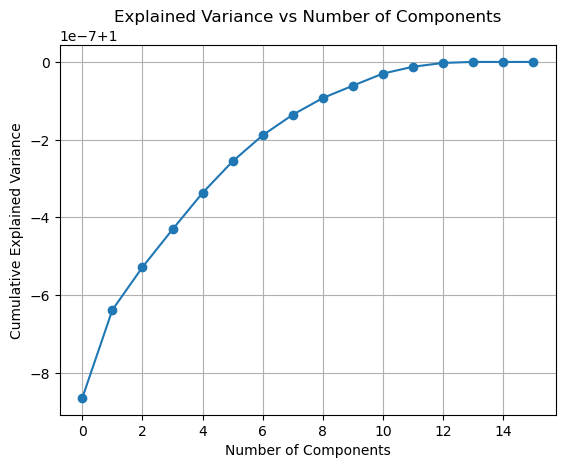

Number of components for 90% variance explained: 1
Number of components for 95% variance explained: 1


In [48]:
### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'most_frequent' as well

# Impute missing values
df_imputed = imputer.fit_transform(df_encoded)

# Initialize PCA
pca = PCA()

# Fit PCA to the imputed data
pca.fit(df_imputed)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Determine the number of components for 90-95% variance explained
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components for 90% variance explained: {n_components_90}")
print(f"Number of components for 95% variance explained: {n_components_95}")



In [49]:
### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well
df_imputed = imputer.fit_transform(df_encoded)

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(df_imputed)

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X_pca)

# Step 4: Assign cluster labels
cluster_labels = kmeans.labels_

# Step 5: Add cluster labels to the DataFrame
df_encoded['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
print(df_encoded.head())


C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


     ID    Income   Recency  NumWebVisitsMonth  Complain  Num_Total_Purchases  \
0  5524  0.234063  0.307039           0.693904 -0.097282             1.320826   
1  2174 -0.234559 -0.383664          -0.130463 -0.097282            -1.154596   
2  4141  0.769478 -0.798086          -0.542647 -0.097282             0.799685   
3  6182 -1.017239 -0.798086           0.281720 -0.097282            -0.894025   
4  5324  0.240221  1.550305          -0.130463 -0.097282             0.539114   

       Kids  TotalAcceptedCmp       Age  Education_2n Cycle  Education_Basic  \
0 -1.264505          0.621248  0.985345               False            False   
1  1.396361         -0.501912  1.235733               False            False   
2 -1.264505         -0.501912  0.317643               False            False   
3  0.065928         -0.501912 -1.268149               False            False   
4  0.065928         -0.501912 -1.017761               False            False   

   Education_Graduation  Educati

In [ ]:
### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Apply Agglomerative clustering on the original dataset
# Initialize Agglomerative clustering with the desired number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Adjust the number of clusters as needed

# Fit Agglomerative clustering to the original data
agg_labels = agg_clustering.fit_predict(df_encoded.drop(columns=['Cluster']))

# Step 2: Perform bivariate analysis
# Add cluster labels to the DataFrame
df_encoded['Agg_Cluster'] = agg_labels

# Step 3: Visualize the clusters
# Plot bivariate analysis between cluster label and different features
sns.pairplot(df_encoded, hue='Agg_Cluster', diag_kind='kde')
plt.show()

